In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from scipy.stats import bernoulli
from collections import Counter
from matplotlib import colors

In [2]:
class DummyBinaryClassifier(BaseEstimator):
    def __init__(self,method="bernoulli",p=0.5):
        self.p = 0.5 if p < 0.0 or p > 1.0 else p
        self.method = method if method in ["bernoulli","uniform_random","normal"] else "bernoulli"
    def fit(self,X,y=None):
        return
    def predict(self,X):
        if self.method == "normal":
            return (0.5 + np.random.randn(len(X))) < self.p
        elif self.method == "bernoulli":
            return np.bool_(bernoulli.rvs(self.p, size=len(X)))
        else:
            return np.random.rand(len(X)) <= self.p

In [3]:
def compute_priors(y):
    c = Counter(y)
    prop = {i[0]:i[1]/len(y) for i in c.items()}
    if True not in prop:
        prop[True] = 0.0
    if False not in prop:
        prop[False] = 0.0
    #print(prop)
    return prop
    

In [4]:
# Input: 100 random samples
X = np.random.rand(100)

In [5]:
p_values = np.arange(0.0,1.0,0.1)

In [6]:

bernoulli_priors=[]
normal_priors=[]
uniform_priors=[]

for p in p_values:
    # To compute the Bernouli priors
    y_ber = DummyBinaryClassifier("bernoulli",p).predict(X)
    prop_ber = compute_priors(y_ber)
    bernoulli_priors.append(prop_ber[True])
    
    # To compute the Normal priors
    y_nor = DummyBinaryClassifier("normal",p).predict(X)
    prop_nor = compute_priors(y_nor)
    normal_priors.append(prop_nor[True])
    
    # To compute the Uniform_random priors
    y_uni = DummyBinaryClassifier("uniform_random",p).predict(X)
    prop_uni = compute_priors(y_uni)
    uniform_priors.append(prop_uni[True])

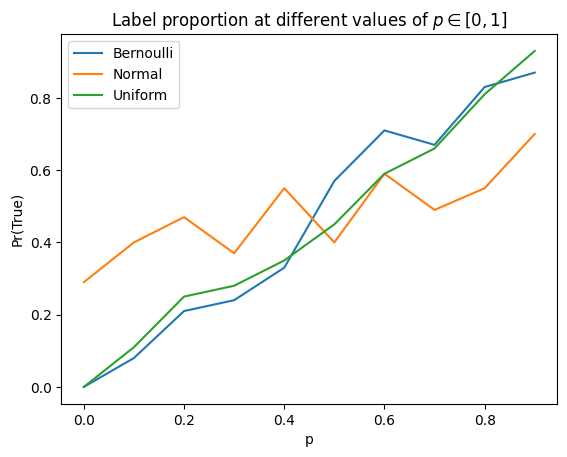

In [7]:
import matplotlib.pyplot as plt
plt.plot(p_values, bernoulli_priors)
plt.plot(p_values, normal_priors)
plt.plot(p_values, uniform_priors)
plt.xlabel('p')
plt.ylabel('Pr(True)')
plt.title('Label proportion at different values of $p\in[0,1]$')
plt.legend(['Bernoulli','Normal','Uniform'], loc='upper left')
plt.show()

### Task2 : IRIS dataset



In [8]:
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, average_precision_score , auc

In [9]:
iris = load_iris()
X,y = iris.data,iris.target

To check for the no of elements of three classes of IRIS dataset.

In [10]:
arr=pd.Series(iris.target)
arr.value_counts()

0    50
1    50
2    50
dtype: int64

Since each of the classes have equal elements, Let the first class('setosa') be True  and the other two classes('versicolor', 'virginica') be False to convert the dataset into a Binary IRIS dataset.

In [11]:
y[y==0] = 1
y[50:] = 0
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
arr=pd.Series(y)
arr.value_counts() # The dataset now has two labels 0 and 1.

0    100
1     50
dtype: int64

### Label prior of the binary IRIS dataset

In [13]:
iris_prior_pred = DummyBinaryClassifier('bernoulli',0.3).predict(X)

In [14]:
#Task 2.1
prop_iris = compute_priors(iris_prior_pred)
prop_iris 
# The label prior depends on the 'p' with which we instantite the DummyBinaryClassifier and it doesn't depend on the inputs.

{False: 0.7066666666666667, True: 0.29333333333333333}

In [15]:
p_values = np.arange(0.0,1.1,0.1)
p_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [16]:
#Task 2.2

iris_prop = []
precision = []
recall = []
F1 =[]
fpr =[]
tpr =[]
auprc = []
auc_roc = []

for p in p_values:
    # The label prior for the IRIS data
    iris_pred = DummyBinaryClassifier('bernoulli',p).predict(X)
    prop_iris = compute_priors(iris_pred)
    iris_prop.append(prop_iris[True])
    
    # Precision, Recall and F1 for each value of p
    precision.append(precision_score(y,iris_pred))
    recall.append(recall_score(y,iris_pred))
    F1.append(f1_score(y,iris_pred))
    
    # True positive rate and false positive rate foe each value of p
    fpr_p, tpr_p,threshold_p = roc_curve(y,iris_pred)
    
    fpr.append(fpr_p)
    tpr.append(tpr_p)
    
    # AUPRC and AuRoC for each value of P
    auc_roc.append(roc_auc_score(y,iris_pred))
    auprc.append(average_precision_score(y,iris_pred))
    
    



C:\Users\MANOJ\.conda\envs\ProjectAutoKeras\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
iris_prop # The label prior for the IRIS data

[0.0,
 0.09333333333333334,
 0.18,
 0.34,
 0.3333333333333333,
 0.47333333333333333,
 0.5666666666666667,
 0.7133333333333334,
 0.8,
 0.88,
 1.0]

In [18]:
recall # Recall for each value of p

[0.0, 0.1, 0.22, 0.34, 0.34, 0.56, 0.48, 0.78, 0.82, 0.86, 1.0]

In [19]:
precision # Precision for each value of p

[0.0,
 0.35714285714285715,
 0.4074074074074074,
 0.3333333333333333,
 0.34,
 0.39436619718309857,
 0.2823529411764706,
 0.3644859813084112,
 0.3416666666666667,
 0.32575757575757575,
 0.3333333333333333]

In [20]:
F1 # F1 for each value of p

[0.0,
 0.15625,
 0.2857142857142857,
 0.33663366336633666,
 0.34,
 0.4628099173553719,
 0.35555555555555557,
 0.4968152866242038,
 0.4823529411764706,
 0.4725274725274725,
 0.5]

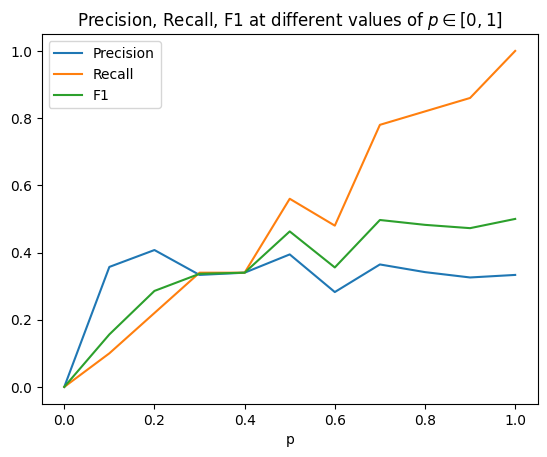

In [21]:
plt.plot(p_values, precision)
plt.plot(p_values, recall)
plt.plot(p_values, F1)
plt.xlabel('p')
#plt.ylabel('Pr(True)')
plt.title('Precision, Recall, F1 at different values of $p\in[0,1]$')
plt.legend(['Precision','Recall','F1'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'PRC')

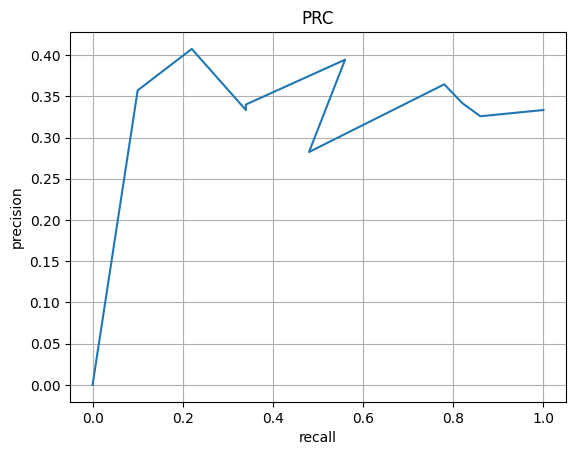

In [22]:
#Task 2.3
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PRC')


Text(0.5, 1.0, 'RoC')

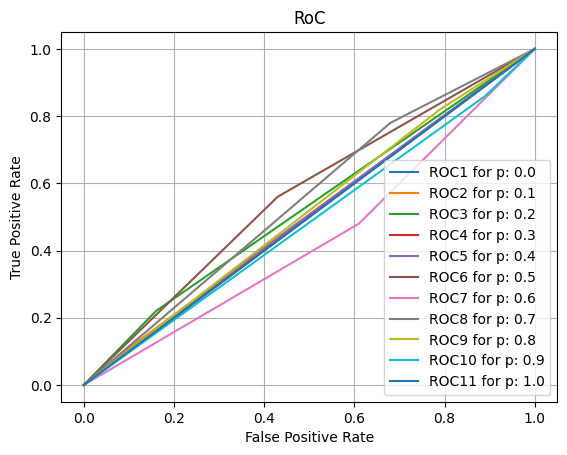

In [23]:
#Task 2.4
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i],label=f'ROC{i+1} for p: {round(0.1*i,1)}')
    
plt.legend()  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.title('RoC')

In [24]:
#Task 2.5
print("The Area under RoC curve for diff values of p:",auc_roc)
print()
print("The Area under PRC for diff values of p:",auprc)

The Area under RoC curve for diff values of p: [0.5, 0.505, 0.5299999999999999, 0.5, 0.505, 0.5650000000000001, 0.43500000000000005, 0.55, 0.515, 0.485, 0.5]

The Area under PRC for diff values of p: [0.3333333333333333, 0.3357142857142857, 0.3496296296296296, 0.3333333333333333, 0.3356, 0.3675117370892018, 0.30886274509803924, 0.3576323987538941, 0.3401666666666667, 0.32681818181818184, 0.3333333333333333]


### Task 3: Visualization of Decision Boundaries

For visualization, using the input features of iris dataset to create the 2D grid doesn't make sense as the dummy classifier doesn't depend on the data and the classifer returns a random value of 0 and 1's based on p.

Let us consider the feature Sepal Width and Petal Width in order to create the grid

In [25]:
df = pd.DataFrame(X,columns=iris.feature_names)
X_df = df[[df.columns[1],df.columns[3]]] # Sepal Width and Petal Width features


In [26]:
x1 = X_df[X_df.columns[0]]
x2 = X_df[X_df.columns[1]]

In [27]:
x1.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [28]:
x2.head()

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal width (cm), dtype: float64

In [29]:
# generating 100 points within min-max range
grid_x1 = np.linspace(x1.min(), x1.max(), 100)
grid_x2 = np.linspace(x2.min(), x2.max(), 100)
# creates a rectangular grid out of two given one-dimensional arrays
x1v, x2v = np.meshgrid(grid_x1, grid_x2) 

In [30]:
# Creating a dataframe for the synthetic mesh data and to estimate the predictions
print("Shape of x1v: ",x1v.shape)
print("Shape of x2v: ",x2v.shape)

# x1v and x2v are 2d arrays and need to be converted into a 1d array to be fed into the model for predictions.
# functions such as flatten() and ravel() are used.

data = pd.DataFrame(data=np.column_stack((x1v.flatten(), x2v.flatten())), columns=X_df.columns)
# np.column_stack((x1v.flatten(), x2v.flatten())) --> Two columns of 10000 rows each
print("Shape of data fed into model: ",data.shape)

Shape of x1v:  (100, 100)
Shape of x2v:  (100, 100)
Shape of data fed into model:  (10000, 2)


In [31]:
p_value = np.arange(0,1.25,0.25)
p_value

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Bernoulli method

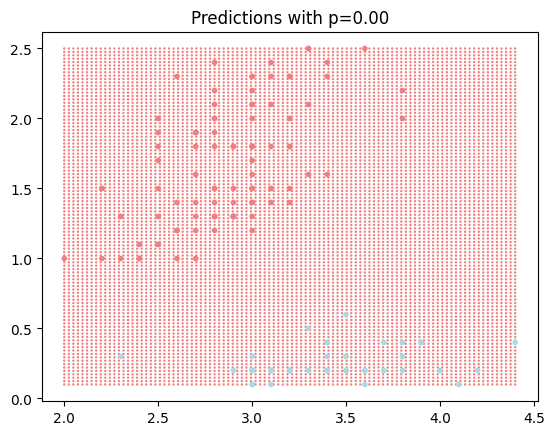

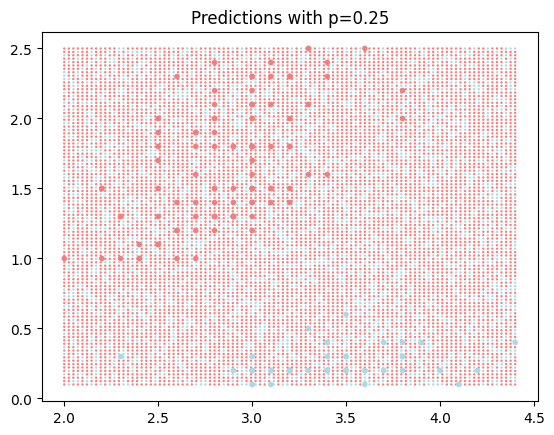

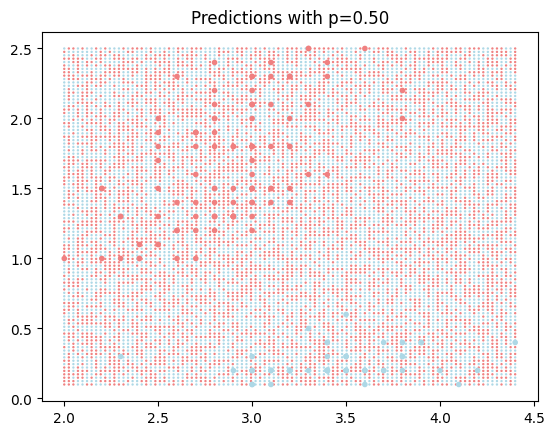

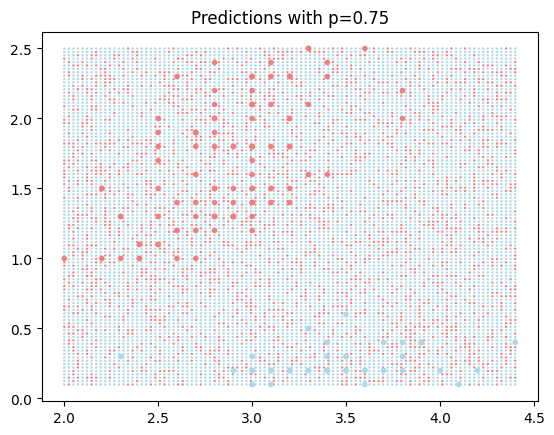

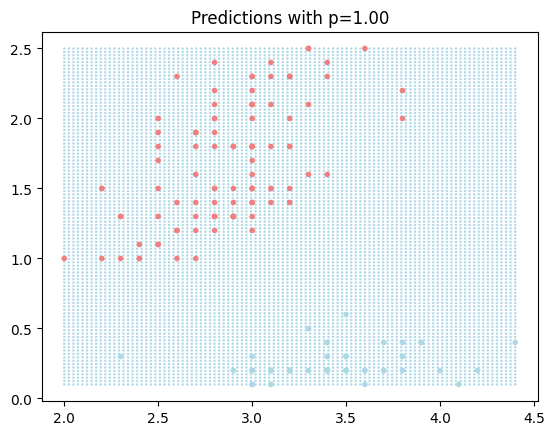

In [32]:
for p in p_value:
    
    y_pred = DummyBinaryClassifier("bernoulli",p).predict(data)
    y_reshape = y_pred.reshape(x1v.shape)
    plt.figure()
    color_map = colors.ListedColormap(['lightcoral', 'lightblue'])
    plt.scatter(x1v, x2v, marker='.', s=2, c=y_pred, cmap=color_map,vmin=0,vmax=1)
    plt.scatter(x1, x2, marker='.', c=y, cmap=color_map)
    plt.title(f'Predictions with p={p:.2f}')
    plt.show()

### Normal method

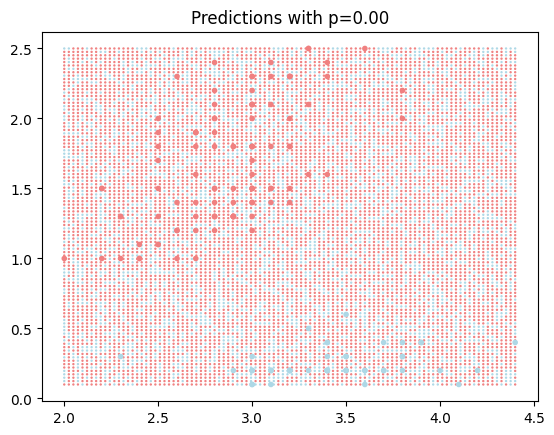

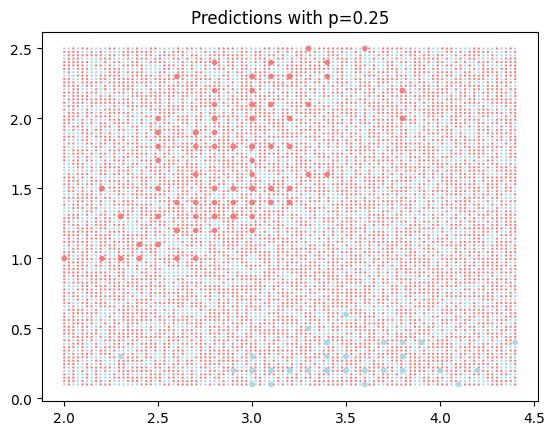

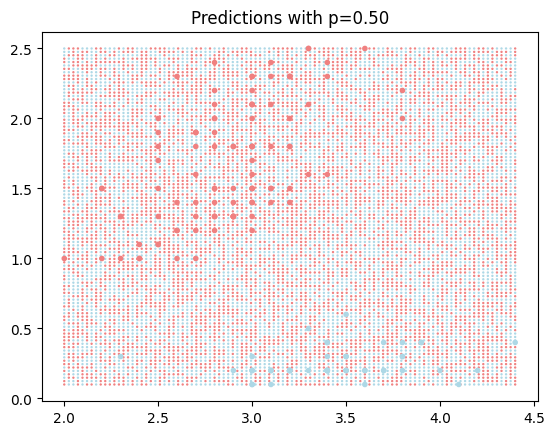

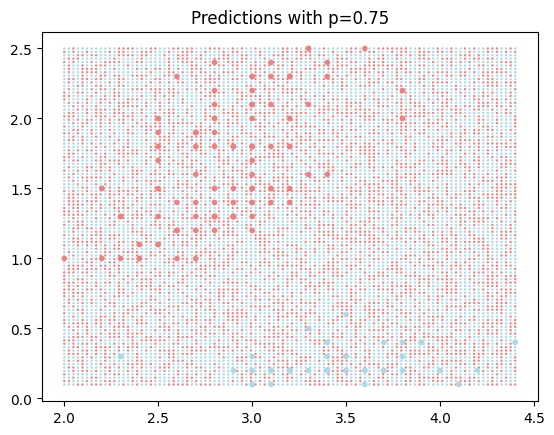

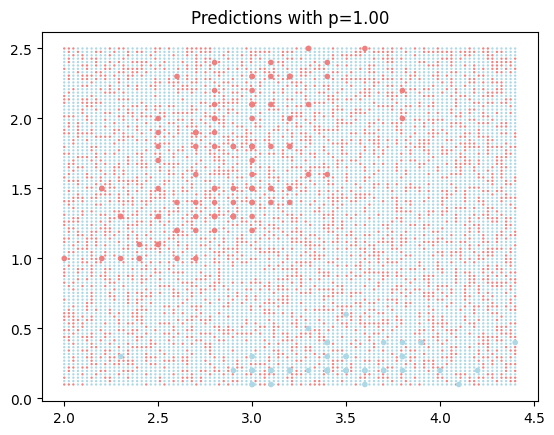

In [33]:
for p in p_value:
    y_pred = DummyBinaryClassifier("normal",p).predict(data)
    y_reshape = y_pred.reshape(x1v.shape)
    plt.figure()
    color_map = colors.ListedColormap(['lightcoral', 'lightblue'])
    plt.scatter(x1v, x2v, marker='.', s=2, c=y_pred, cmap=color_map)
    plt.scatter(x1, x2, marker='.', c=y, cmap=color_map)
    plt.title(f'Predictions with p={p:.2f}')
    plt.show()


### Uniform Random method

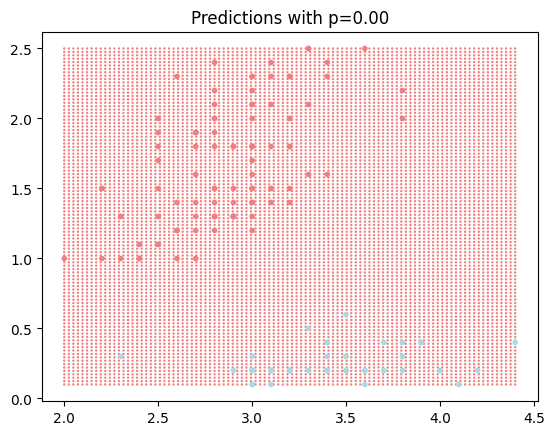

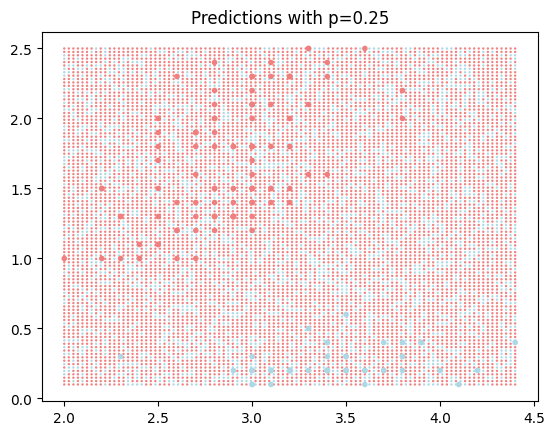

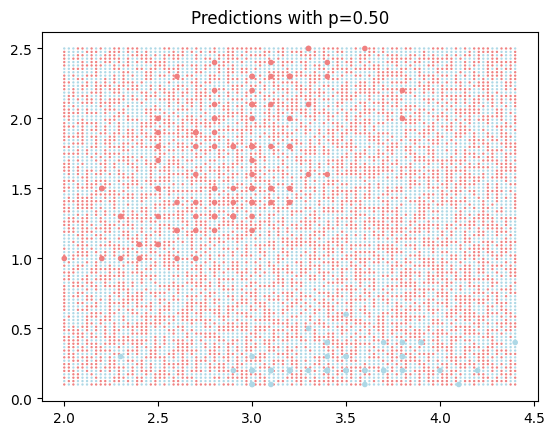

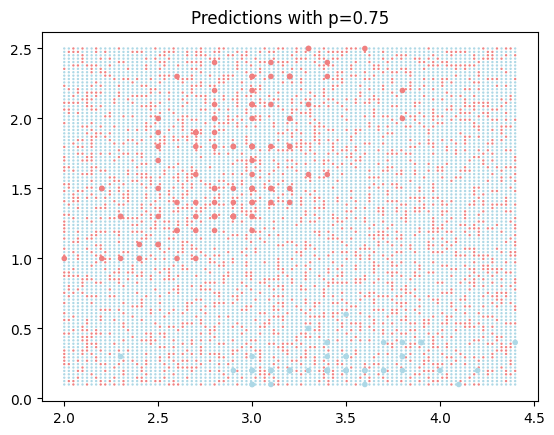

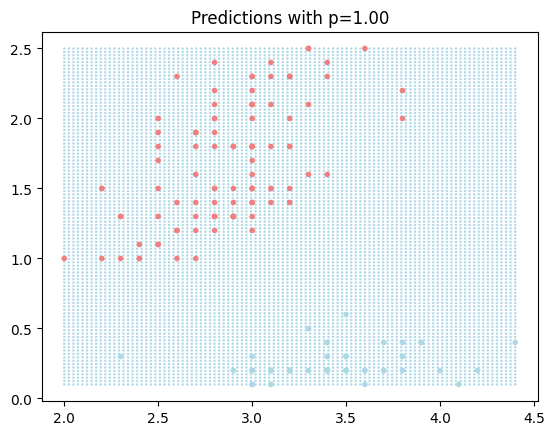

In [34]:
for p in p_value:
    y_pred = DummyBinaryClassifier("uniform_random",p).predict(data)
    y_reshape = y_pred.reshape(x1v.shape)
    plt.figure()
    color_map = colors.ListedColormap(['lightcoral', 'lightblue'])
    plt.scatter(x1v, x2v, marker='.', s=2, c=y_pred, cmap=color_map,vmin=0,vmax=1)
    plt.scatter(x1, x2, marker='.', c=y, cmap=color_map)
    plt.title(f'Predictions with p={p:.2f}')
    plt.show()